In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.simplefilter('ignore')


In [2]:
df = pd.read_csv('cleaned_train.csv')
df.head()

Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         0       3    1 -0.567258      1      0 -0.877591         2
1         1       1    0  0.683970      1      0  1.366380         0
2         1       3    0 -0.254451      0      0 -0.796281         2
3         1       1    0  0.449365      1      0  1.066796         2
4         0       3    1  0.449365      0      0 -0.781901         2

In [3]:
X = df.drop(['Survived'],axis = 1)
y =df['Survived']


In [4]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 6)

**Logistic Regression**

In [6]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
#prediction
ypred_train_lr = lr.predict(X_train)
ypred_test_lr =lr.predict(X_test) 
#evaluation 
print('Train Accuracy:',accuracy_score(y_train,ypred_train_lr))
print('Cross Validation Score:',cross_val_score(lr,X_train,y_train,cv = 5).mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test_lr))

Train Accuracy: 0.8045007032348804
Cross Validation Score: 0.80169408056732
Test Accuracy: 0.8033707865168539


In [7]:
# confusion matrix
print(confusion_matrix(y_test,ypred_test_lr))

[[90 14]
 [21 53]]


In [8]:
# classification Report 
print(classification_report(y_test,ypred_test_lr))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       104
           1       0.79      0.72      0.75        74

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



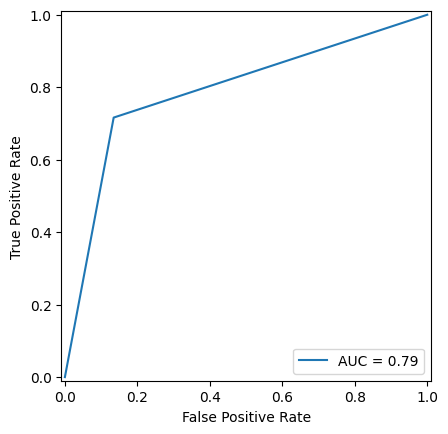

In [9]:
from sklearn.metrics import roc_curve ,auc,RocCurveDisplay
fpr ,tpr,thresholds = roc_curve(y_test,ypred_test_lr)

roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr = fpr ,tpr = tpr,roc_auc = roc_auc).plot()
plt.show()

In [10]:
# AUC Score
from sklearn.metrics import roc_auc_score
print('AUC Score',roc_auc_score(y_test,ypred_test_lr))

AUC Score 0.7908004158004159


**KNN**

In [11]:
#hyperparameter tunning 
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,100)),'p':[1,2]}
knn_grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv =5)
knn_grid.fit(X_train,y_train)
# best parameter 
knn_grid.best_params_

{'n_neighbors': 16, 'p': 1}

In [12]:
# modelling 
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train,y_train)

# prediction and evaluation on trian data 
ypred_train = knn_model.predict(X_train)
print('Train Accuracy:',accuracy_score(y_train,ypred_train))
# Cross validation on train data 
print('Cross Validation Score:',cross_val_score(knn_model,X_train,y_train,cv=5,scoring = 'accuracy').mean())

# prediction and evaluation in test data 
ypred_test = knn_model.predict(X_test)
print('Teat Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8326300984528833
Cross Validation Score: 0.8101841820151681
Teat Accuracy: 0.8146067415730337


**SVM**

In [13]:
estimator = SVC()
# param_grid
param_grid = {'C':[6,8,9,10],'kernel':['linear','poly','rbf','sigmoid']}
svm_grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')
svm_grid.fit(X_train,y_train)

# best parameter
print(svm_grid.best_params_)
svm_grid.best_estimator_

{'C': 10, 'kernel': 'rbf'}


SVC(C=10)

In [14]:
#modelling 
svm_model = svm_grid.best_estimator_
svm_model.fit(X_train,y_train)

# prediction and evaluation on train data 
ypred_train=svm_model.predict(X_train)
print('Train Accuracy:',accuracy_score(y_train,ypred_train))

# Cross validation score on trian data 
print('Cross Validation Score:',cross_val_score(svm_model,X_train,y_train,cv = 5,scoring = 'accuracy').mean())

# prediction and evaluation on test data 
ypred_test = svm_model.predict(X_test)
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8424753867791842
Cross Validation Score: 0.8270560425490002
Test Accuracy: 0.8202247191011236


**Decision Tree**

In [15]:
model = DecisionTreeClassifier(random_state=6)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=6)

In [16]:
from sklearn.tree import plot_tree 
plt.figure(figsize = (30,30),dpi = 600)
plot_tree(model,filled = True,
         feature_names = X_train.columns.tolist(),
         class_names = ['0','1'])
plt.savefig(r'C:\Users\sahur\OneDrive\Desktop\Decision Treee.png')
plt.show()

In [17]:
#Hyperparameter Tunning
estimator = DecisionTreeClassifier(random_state = 6)
param_grid = {'criterion':['gini','entropy'],
             'max_depth':list(range(1,16))}
dt_grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')
dt_grid.fit(X_train,y_train)

# best parameter
print(dt_grid.best_params_)
dt=dt_grid.best_estimator_
dt

{'criterion': 'gini', 'max_depth': 4}


DecisionTreeClassifier(max_depth=4, random_state=6)

In [18]:
# important Feature
feats_ab = pd.DataFrame(data = dt.feature_importances_
                       ,index = X.columns
                       ,columns = ['Important'])
important_feature_dt = feats_ab[feats_ab['Important']>0].index.tolist()
important_feature_dt

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

**Decision Tree with important columns**

In [19]:
# selection Train and Test data 
X_train_dt = X_train[important_feature_dt]
X_test_dt = X_test[important_feature_dt]

# modelling 
dt = dt_grid.best_estimator_
dt.fit(X_train_dt,y_train)

# prediction and evaluation 
ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Cross Validation Score:',cross_val_score(dt,X_train_dt,y_train,cv=5,scoring = 'accuracy').mean())
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8340365682137834
Cross Validation Score: 0.81863488624052
Test Accuracy: 0.8258426966292135


**Random Forest Classifier**

In [20]:
# Hyper parameter Tunning 
estimator = RandomForestClassifier(random_state =True)

param_grid = {'n_estimators':list(range(1,51))}
rf_grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv = 5)
rf_grid.fit(X_train,y_train)
rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=38, random_state=True)

In [21]:
# Important features 
feats_ab = pd.DataFrame(data = rf.feature_importances_,
                       index = X.columns,
                       columns = ['Importance'])
important_features_rf = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_rf

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [22]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [25]:
X_train_rf = X_train[important_features_rf]
X_test_rf = X_test[important_features_rf]

#Modelling 
rf = rf_grid.best_estimator_
rf.fit(X_train_rf,y_train)

#Evaluation 
ypred_train = rf.predict(X_train_rf)
ypred_test  = rf.predict(X_test_rf)

print('Train accuracy:',accuracy_score(y_train,ypred_train))
print('Test accuracy:',accuracy_score(y_test,ypred_test))
print('Cross validation Score:',cross_val_score(rf,X_train_rf,y_train,cv = 5).mean())

Train accuracy: 0.9845288326300985
Test accuracy: 0.8314606741573034
Cross validation Score: 0.8101644834039201


**AdaBoost Classifier**

In [26]:
estimator = AdaBoostClassifier(random_state = True)
param_grid = {'n_estimators':list(range(1,51))}
ab_grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv = 5)
ab_grid.fit(X_train,y_train)

ab = ab_grid.best_estimator_
ab


AdaBoostClassifier(n_estimators=25, random_state=True)

In [27]:
#Important Features
feats_ab =pd.DataFrame(data = ab.feature_importances_,
                      index = X.columns,
                      columns = ['Importance'])

important_features_ab = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_ab

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [29]:
X_train_ab = X_train[important_features_ab]
X_test_ab = X_test[important_features_ab]

#Modelling
ab = ab_grid.best_estimator_
ab.fit(X_train_ab,y_train)

# Evaluation 
ypred_train = ab.predict(X_train_ab)
ypred_test = ab.predict(X_test_ab)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))
print('Cross validation score:',cross_val_score(ab,X_train_ab,y_train,cv = 5).mean())

Train Accuracy: 0.8129395218002813
Test Accuracy: 0.8089887640449438
Cross validation score: 0.7961095242785384


**Gradient Boost Classifier**

In [44]:
estimator = GradientBoostingClassifier(random_state = True)
param_grid = {'n_estimators':list(range(1,10)),
             'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9,1.0]}
gb_grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv = 5)
gb_grid.fit(X_train,y_train)

gb =gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.3, n_estimators=7, random_state=True)

In [47]:
# important features 
feats_gb = pd.DataFrame(data = gb.feature_importances_,
                       index = X.columns,
                       columns = ['Importance'])

important_feature_gb = feats_gb[feats_gb['Importance']>0].index.tolist()
important_feature_gb

['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [49]:
X_train_gb = X_train[important_feature_gb]
X_test_gb = X_test[important_feature_gb]

gb = gb_grid.best_estimator_
gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))
print('Cross validation Score:',cross_val_score(gb,X_train_gb,y_train,cv = 5).mean())

Train Accuracy: 0.8410689170182841
Test Accuracy: 0.8370786516853933
Cross validation Score: 0.829872943957451


**XGBoost Classifier**

In [51]:
# Hyperparameter tunning 
from xgboost import XGBClassifier 
estimator = XGBClassifier()
param_grid = {'n_estimators':[10,20,30,40,100],
             'max_depth':[3,4,5],
             'gamma':[0,0.15,0.3,0.5,1]}
xgb_grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv = 5)
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
# Important Features 
feats_xgb = pd.DataFrame(data = xgb.feature_importances_,
                        index = X.columns,
                        columns = ['Importance'])
important_features_xgb = feats_xgb[feats_xgb['Importance']>0].index.tolist()
important_features_xgb

['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

In [53]:
X_train_xgb = X_train[important_features_xgb]
X_test_xgb = X_test[important_features_xgb]

# modelling 
xgb = xgb_grid.best_estimator_
xgb.fit(X_train_xgb,y_train)

# Evaluation
ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))
print('Cross validation Score:',cross_val_score(xgb,X_train_xgb,y_train,cv = 5).mean())

Train Accuracy: 0.8551336146272855
Test Accuracy: 0.8539325842696629
Cross validation Score: 0.8228306904363242


**save the best model**

In [54]:
from joblib import dump
dump(xgb,'Titenic.joblib')

['Titenic.joblib']